<div>
<a href="http://www.music-processing.de/"><img style="float:left;" src="../data/FMP_Teaser_Cover.png" width=40% alt="FMP"></a>
<a href="https://www.audiolabs-erlangen.de"><img src="../data/Logo_AudioLabs_Long.png" width=59% style="float: right;" alt="AudioLabs"></a>
</div>

<div> 
<div style="float:right;"><a href="../B/B.html"><img src="../data/B_nav.png" width="100" style="float:right;" alt="B"></a></div>
<div><h1>Python Audio</h1></div>
</div>

<br/>

<p>
There are several ways to read and write audio files in Python, using different packages. This notebooks lists some options and discusses advantages as well as disadvantages. For detailed explanations on how to integrate audio files into the notebooks, we refer to the <a href="../B/B_Multimedia.html">FMP notebook on Multimedia</a>.</p> 

## LibROSA

One option to read audio is to use LibROSA's function [`librosa.load`](https://librosa.org/doc/latest/generated/librosa.load.html). 

* Per default, `librosa.load` resamples the audio to $22050~\mathrm{Hz}$. Setting `sr=None` keeps the native sampling rate.
* The loaded audio is converted to a float with amplitude values lying in the range of $[-1, 1]$.
* `librosa.load` is essentially a wrapper that uses either [`PySoundFile`](https://pysoundfile.readthedocs.io) or [`audioread`](https://github.com/beetbox/audioread).
* When reading audio, `librosa.load` first tries to use [`PySoundFile`](https://pysoundfile.readthedocs.io). This works for many formats, such as WAV, FLAC, and OGG. However, MP3 is not supported. When `PySoundFile` fails to read the audio file (e.g., for MP3), a warning is issued, and `librosa.load` falls back to another library called [`audioread`](https://github.com/beetbox/audioread). When [`ffmpeg`](https://ffmpeg.org/) is available, this library can read MP3 files.

WAV file:  Fs = 11025, x.shape = (45504,), x.dtype = float32


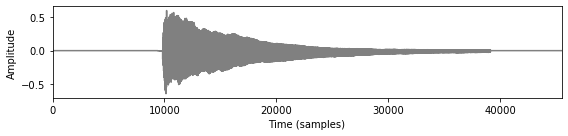

/home/swpffm/miniconda3/envs/FMP/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


MP3 file:  Fs = 11025, x.shape = (47232,), x.dtype = float32


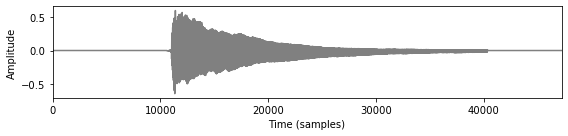

In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
import IPython.display as ipd
import librosa
import pandas as pd
%matplotlib inline

def print_plot_play(x, Fs, text=''):
    """1. Prints information about an audio singal, 2. plots the waveform, and 3. Creates player
    
    Notebook: C1/B_PythonAudio.ipynb
    
    Args: 
        x: Input signal
        Fs: Sampling rate of x    
        text: Text to print
    """
    print('%s Fs = %d, x.shape = %s, x.dtype = %s' % (text, Fs, x.shape, x.dtype))
    plt.figure(figsize=(8, 2))
    plt.plot(x, color='gray')
    plt.xlim([0, x.shape[0]])
    plt.xlabel('Time (samples)')
    plt.ylabel('Amplitude')
    plt.tight_layout()
    plt.show()
    ipd.display(ipd.Audio(data=x, rate=Fs))

# Read wav
fn_wav = os.path.join('..', 'data', 'B', 'FMP_B_Note-C4_Piano.wav')
x, Fs = librosa.load(fn_wav, sr=None)
print_plot_play(x=x, Fs=Fs, text='WAV file: ')

# Read mp3
fn_mp3 = os.path.join('..', 'data', 'B', 'FMP_B_Note-C4_Piano.mp3')
x, Fs = librosa.load(fn_mp3, sr=None)
print_plot_play(x=x, Fs=Fs, text='MP3 file: ')

## PySoundFile

The audio library [`PySoundFile`](https://pysoundfile.readthedocs.io/en/0.9.0/) yields functions for reading and writing sound files. In particular, it contains the functions [`soundfile.read`](https://pysoundfile.readthedocs.io/en/latest/#soundfile.read) and [`soundfile.write`](https://pysoundfile.readthedocs.io/en/latest/#soundfile.write). 

* Per default, the loaded audio is converted to a float with amplitude values lying in the range of $[-1, 1]$. This default can be changed using the `dtype` keyword.
* When writing, it uses signed $16$-bit PCM (`subtype='PCM_16'`) as default.
* There are no resampling options.
* There is no option to read `MP3`-files.

WAV file (default):  Fs = 11025, x.shape = (45504,), x.dtype = float64


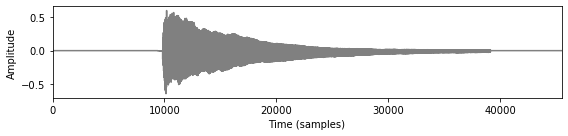

WAV file (dtype=int16):  Fs = 11025, x.shape = (45504,), x.dtype = int16


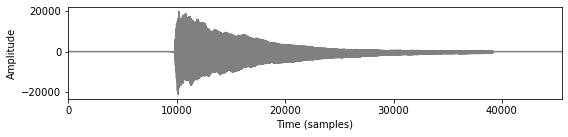

Signal (int16) after writing and reading (default):  Fs = 11025, x.shape = (45504,), x.dtype = float64


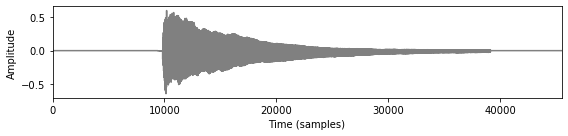

In [2]:
import soundfile as sf

# Read wav with default
fn_wav = os.path.join('..', 'data', 'B', 'FMP_B_Note-C4_Piano.wav')
x, Fs = sf.read(fn_wav)
print_plot_play(x=x,Fs=Fs,text='WAV file (default): ')

# Read wav with dtype= 'int16'
fn_wav = os.path.join('..', 'data', 'B', 'FMP_B_Note-C4_Piano.wav')
x, Fs = sf.read(fn_wav, dtype= 'int16')
print_plot_play(x=x,Fs=Fs,text='WAV file (dtype=int16): ')

# Write 'int16'-signal and read with default
fn_out = os.path.join('..', 'output', 'B', 'FMP_B_Note-C4_Piano_int16.wav')
sf.write(fn_out, x, Fs)
x, Fs = sf.read(fn_out)
print_plot_play(x=x,Fs=Fs,text='Signal (int16) after writing and reading (default): ')

Generated signal:  Fs = 8000, x.shape = (8000,), x.dtype = float64


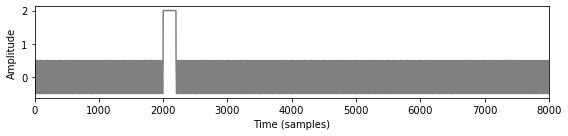

Default for writing files: PCM_16
Signal after writing and reading:  Fs = 8000, x.shape = (8000,), x.dtype = float64


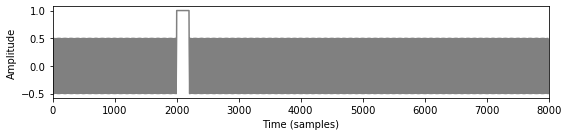

In [3]:
# Generate signal
Fs = 8000
x = 0.5 * np.cos(2 * np.pi * 440 * np.arange(0, Fs) / Fs)
x[2000:2200] = 2
print_plot_play(x=x,Fs=Fs,text='Generated signal: ')

# Write signal
# Default: 'PCM_16'
# Equivalent to pre-processing (dithering + quantization) 
# x = np.int16(np.round(x*(2**15)))
# 
print('Default for writing files:', sf.default_subtype('WAV'))
fn_out = os.path.join('..', 'output', 'B', 'FMP_B_PythonAudio_sine.wav')
sf.write(fn_out, x, Fs, subtype='PCM_16')

# Read generated signal
x, Fs = sf.read(fn_out)
print_plot_play(x=x,Fs=Fs,text='Signal after writing and reading: ')

## SciPy

Scipy offers the [`scipy.io.wavfile`](https://docs.scipy.org/doc/scipy/reference/io.html#module-scipy.io.wavfile) module, which also has functionalities for reading and writing wav files. However, not all variants of the wav format are support. For example, $24$-bit integer `WAV`-files are not allowed. Furthermore, certain metadata fields in a wav file may also lead to errors. Therefore, we do not recommend this option.

Signal after writing and reading:  Fs = 11025, x.shape = (45504,), x.dtype = int16


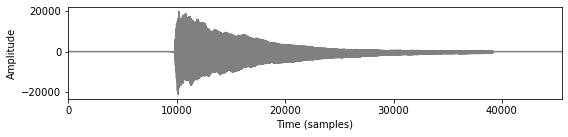

In [4]:
from scipy.io import wavfile

Fs, x = wavfile.read(fn_wav)
print_plot_play(x=x,Fs=Fs,text='Signal after writing and reading: ')

## Wrapper Functions in `libfmp`

Wrapper functions for reading and writing audio have also been included in `libfmp`.
These wrappers reflect our default recommendations to use `librosa` for loading audio, and `PySoundFile` for writing audio.
In the following code cell, we call these functions:

In [5]:
import sys
sys.path.append('..')

import libfmp.b

fn_wav = os.path.join('..', 'data', 'B', 'FMP_B_Note-C4_Piano.wav')
fn_out = os.path.join('..', 'output', 'B', 'FMP_B_Note-C4_Piano.wav')

x, Fs = libfmp.b.read_audio(fn_wav)
libfmp.b.write_audio(fn_out, x, Fs)

## Normalized Audio Playback 

In the [FMP notebook on multimedia](../B/B_Multimedia.html), we introduced the class

`IPython.display.Audio(data=None, filename=None, url=None, embed=None, rate=None, autoplay=False, normalize=True, *, element_id=None)`

for audio playback ([`IPython` version 6.0 or higher](https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html)), which is frequently used in the FMP notebooks. As default, this class **normalizes** the audio (dividing by the maximum over all sample values) before playback. This may be unwanted for certain applications, where the volume of the audio should be kept to its original level. To avoid normalization, one has to set the parameter `normalize=False`. However, this requires that all samples of the audio lie within the range between $-1$ and $-1$. In the following code cell, we give an illustrative examples for the two options.

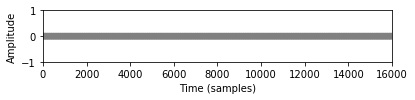

Audio playback with default settings (normalized audio)


Audio playback without normalization (original audio) 


In [6]:
Fs = 8000
x = 0.1 * np.cos(2 * np.pi * 440 * np.arange(0, 2 * Fs) / Fs)

plt.figure(figsize=(6, 1.5))
plt.plot(x, color='gray')
plt.xlim([0, x.shape[0]])
plt.ylim([-1, 1])
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

print('Audio playback with default settings (normalized audio)')
ipd.display(ipd.Audio(data=x, rate=Fs))

print('Audio playback without normalization (original audio) ')
ipd.display(ipd.Audio(data=x, rate=Fs, normalize=False))

## Audio Playback List

In the following code cell, we provide a function for placing several audio players next to each other. Furthermore, the function allows for adapting the width and the height of the individual players. Note that, when the width of the audio player becomes too small, some playback information may be hidden or the playback bottom may be placed in a drop-down menu.

In [7]:
def audio_player_list(signals, rates, width=270, height=40, columns=None, column_align='center'):
    """Generate a list of HTML audio players tags for a given list of audio signals.

    Notebook: B/B_PythonAudio.ipynb

    Args:
        signals (list): List of audio signals
        rates (list): List of sample rates
        width (int): Width of player (either number or list) (Default value = 270)
        height (int): Height of player (either number or list) (Default value = 40)
        columns (list): Column headings (Default value = None)
        column_align (str): Left, center, right (Default value = 'center')
    """
    pd.set_option('display.max_colwidth', None)

    if isinstance(width, int):
        width = [width] * len(signals)
    if isinstance(height, int):
        height = [height] * len(signals)

    audio_list = []
    for cur_x, cur_Fs, cur_width, cur_height in zip(signals, rates, width, height):
        audio_html = ipd.Audio(data=cur_x, rate=cur_Fs)._repr_html_()
        audio_html = audio_html.replace('\n', '').strip()
        audio_html = audio_html.replace('<audio ', f'<audio style="width: {cur_width}px; height: {cur_height}px" ')
        audio_list.append([audio_html])

    df = pd.DataFrame(audio_list, index=columns).T
    table_html = df.to_html(escape=False, index=False, header=bool(columns))
    table_html = table_html.replace('<th>', f'<th style="text-align: {column_align}">')
    ipd.display(ipd.HTML(table_html))
    
fn_wav = os.path.join('..', 'data', 'B', 'FMP_B_Note-C4_Piano.wav')
x, Fs = librosa.load(fn_wav, sr=None)

audio_player_list([x, x, x, x], [Fs, Fs, Fs, Fs], width=120, height=20, 
                  columns=['a', 'b', 'c', 'd'])

audio_player_list([x, x, x], [Fs, Fs, Fs], width=200, height=80, 
                  columns=['a', 'b', 'c'], column_align='left')


audio_player_list([x, x, x, x], [Fs, Fs, Fs, Fs], 
                  width=[40, 80, 150, 300], height=[20, 40, 60, 80], 
                  columns=['a', 'b', 'c', 'd'], column_align='right')

a,b,c,d


a,b,c


a,b,c,d


<div class="alert" style="background-color:#F5F5F5; border-color:#C8C8C8">
<strong>Acknowledgment:</strong> This notebook was created by <a href="https://www.audiolabs-erlangen.de/fau/assistant/zalkow">Frank Zalkow</a> and <a href="https://www.audiolabs-erlangen.de/fau/professor/mueller">Meinard Müller</a>.
</div>

<table style="border:none">
<tr style="border:none">
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C0/C0.html"><img src="../data/C0_nav.png" style="height:50px" alt="C0"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C1/C1.html"><img src="../data/C1_nav.png" style="height:50px" alt="C1"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C2/C2.html"><img src="../data/C2_nav.png" style="height:50px" alt="C2"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C3/C3.html"><img src="../data/C3_nav.png" style="height:50px" alt="C3"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C4/C4.html"><img src="../data/C4_nav.png" style="height:50px" alt="C4"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C5/C5.html"><img src="../data/C5_nav.png" style="height:50px" alt="C5"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C6/C6.html"><img src="../data/C6_nav.png" style="height:50px" alt="C6"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C7/C7.html"><img src="../data/C7_nav.png" style="height:50px" alt="C7"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C8/C8.html"><img src="../data/C8_nav.png" style="height:50px" alt="C8"></a></td>
</tr>
</table>